# CO2 emission prediction of cars

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

## Read Data Set

In [4]:
df=pd.read_csv("/Users/enejanhayytjanova/Desktop/co2.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(7385, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


## Correlation

In [8]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


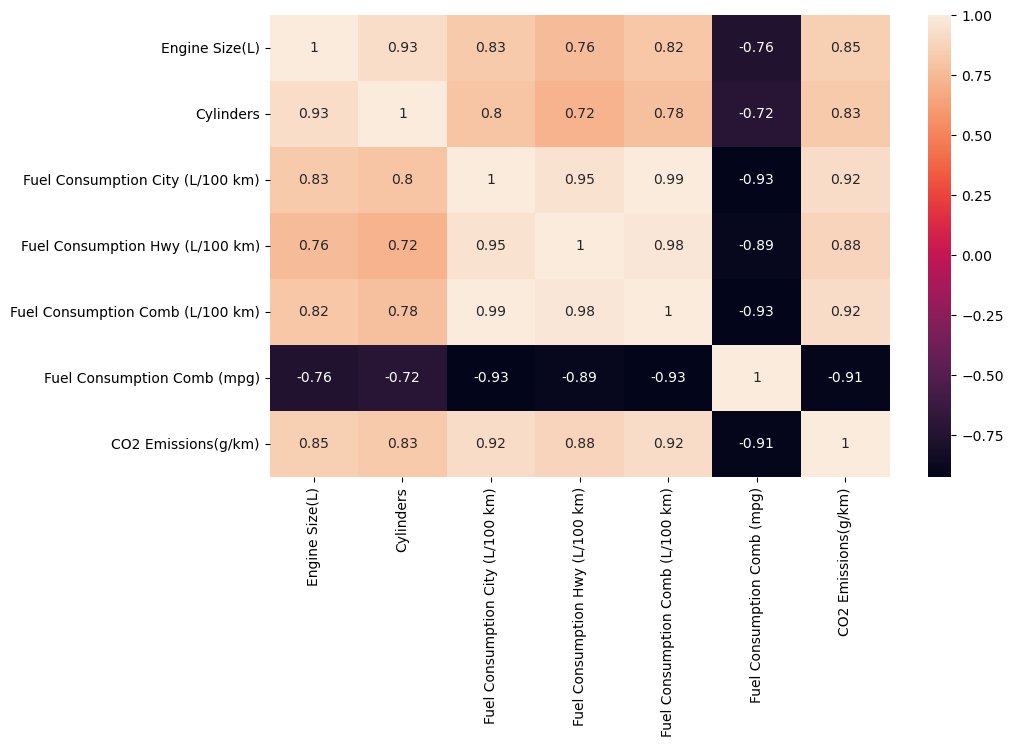

In [9]:
sns.heatmap(df.corr(), annot=True);

SLR yaparken Engine Size(L) ve CO2 Emissions(g/km) columnlarını kullanacaksınız.

In [10]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [11]:
df = df.iloc[:, [3, 11]]    # sales degerini en sona almak için
df.head()

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


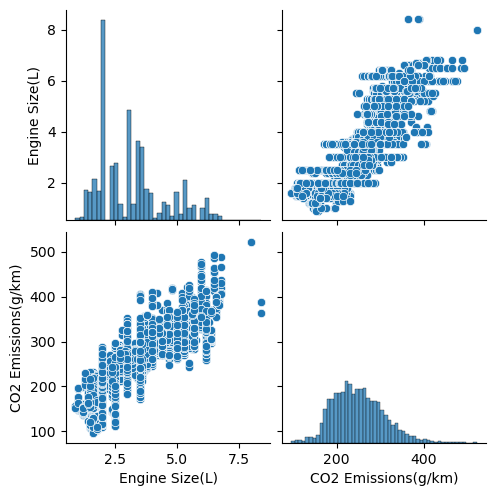

In [12]:
sns.pairplot(df)

In [13]:
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

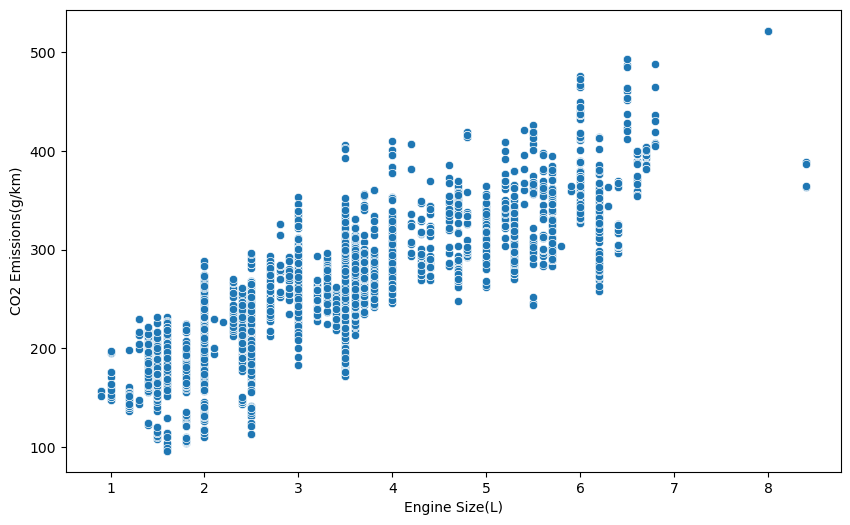

In [14]:
sns.scatterplot(x="Engine Size(L)", y = "CO2 Emissions(g/km)", data=df);

In [15]:
corr = df["Engine Size(L)"].corr(df["CO2 Emissions(g/km)"])
corr

0.8511446437900011

In [16]:
R2_score = corr**2
R2_score

0.7244472046524079

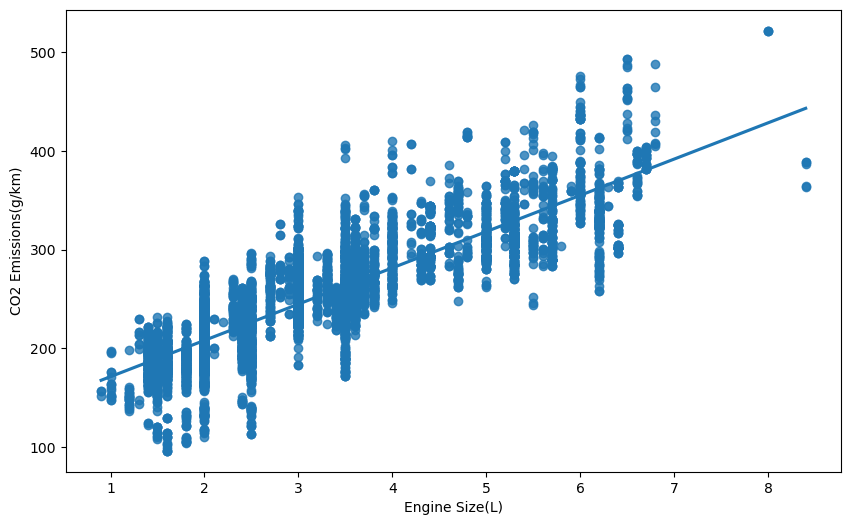

In [17]:
# Least square Error LSE ile Line of Best fit seçimi

sns.regplot(x = "Engine Size(L)", y ="CO2 Emissions(g/km)", data=df, ci=None);

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [21]:
scaler = StandardScaler()

In [22]:
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.86311156],
       [-0.86311156],
       [ 1.57256625],
       ...,
       [ 1.57256625],
       [-0.56787789],
       [-0.56787789]])

In [24]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.56787789],
       [-0.86311156],
       [ 0.31782313],
       ...,
       [ 1.86779992],
       [ 2.08922518],
       [-0.12502738]])

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [30]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "sing_linear") 
ls 

,sing_linear_train,sing_linear_test
R2,0.718368,0.738833
mae,23.631283,22.446376
mse,969.612930,882.099147
rmse,31.138608,29.700154


In [31]:
lm.coef_

array([49.73152524])

In [32]:
lm.intercept_

250.6991681176243

## Cross Validation

In [33]:
from sklearn.model_selection import cross_validate, cross_val_score

In [34]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [35]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000903,0.000608,0.706525,-24.557101,-1027.461811,-32.054045
2,0.000333,0.000481,0.720055,-22.987874,-933.319870,-30.550284
3,0.000283,0.000478,0.722405,-22.987124,-930.173185,-30.498741
4,0.000285,0.000443,0.717320,-23.880474,-991.197077,-31.483282
5,0.000270,0.000456,0.723469,-23.763598,-968.574833,-31.121935


In [36]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df
cv_df.iloc[:, 2:].mean()

cv_test_r2                               0.717955
cv_test_neg_mean_absolute_error        -23.635234
cv_test_neg_mean_squared_error        -970.145355
cv_test_neg_root_mean_squared_error    -31.141658
dtype: float64

In [37]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.718368,0.738833
mae,23.631283,22.446376
mse,969.612930,882.099147
rmse,31.138608,29.700154


In [38]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,49.731525


In [39]:
lm.coef_

array([49.73152524])

In [40]:
df

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


MLR Engine Size(L), Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption City (L/100 km), CO2 Emissions(g/km) columnlarını kullanacaksınız.

In [41]:
df_1 =pd.read_csv("/Users/enejanhayytjanova/Desktop/co2.csv")
df_1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [42]:
df_1.drop(columns=["Make", "Model", "Vehicle Class","Cylinders", "Transmission","Fuel Type", "Fuel Consumption Comb (mpg)"], axis=1, inplace=True )

In [43]:
df_1

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...
7380,2.0,10.7,7.7,9.4,219
7381,2.0,11.2,8.3,9.9,232
7382,2.0,11.7,8.6,10.3,240
7383,2.0,11.2,8.3,9.9,232


In [44]:
X = df_1.drop("CO2 Emissions(g/km)",  axis=1)
y = df_1["CO2 Emissions(g/km)"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.86311156, -0.67523233, -0.83038175, -0.71944554],
       [-0.86311156, -0.84706553, -0.9204934 , -0.89274411],
       [ 1.57256625,  1.73043245,  2.1883586 ,  1.91469271],
       ...,
       [ 1.57256625,  0.81398872,  0.79162799,  0.80558187],
       [-0.56787789,  0.87126645,  0.79162799,  0.84024158],
       [-0.56787789, -0.3602048 , -0.28971184, -0.33818869]])

In [47]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.56787789, -0.3602048 ,  0.20590225, -0.16489012],
       [-0.86311156, -2.02125906, -1.50621914, -1.86321609],
       [ 0.31782313,  0.64215552,  0.38612555,  0.56296387],
       ...,
       [ 1.86779992,  1.61587698,  2.27847025,  1.84537328],
       [ 2.08922518,  2.24593204,  1.3322979 ,  1.94935242],
       [-0.12502738, -0.13109387, -0.33476766, -0.23420955]])

In [48]:
lm_1 = LinearRegression()

In [49]:
lm_1.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
y_pred = lm_1.predict(X_test_scaled)
y_train_pred = lm_1.predict(X_train_scaled)

In [51]:
ls_1 = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls_1 

,linear_train,linear_test
R2,0.873668,0.873554
mae,13.424130,13.156975
mse,434.941944,427.074018
rmse,20.855262,20.665769


In [52]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [53]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df.iloc[:, 2:].mean()

cv_test_r2                               0.873346
cv_test_neg_mean_absolute_error        -13.437805
cv_test_neg_mean_squared_error        -436.083450
cv_test_neg_root_mean_squared_error    -20.853070
dtype: float64

In [54]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.873668,0.873554
mae,13.424130,13.156975
mse,434.941944,427.074018
rmse,20.855262,20.665769


In [55]:
lm_1.coef_

array([16.98517207, 14.96294262,  4.57365974, 20.74378032])

In [56]:
lm_1_df = pd.DataFrame(lm_1.coef_, columns = ["lm_1_coef"])
lm_1_df

,lm_1_coef
0,16.985172
1,14.962943
2,4.573660
3,20.743780


## Regularization

### Ridge

In [57]:
from sklearn.linear_model import Ridge

In [58]:
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [59]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [60]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [61]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.873667,0.873543
mae,13.424475,13.158126
mse,434.944562,427.110221
rmse,20.855325,20.666645


In [62]:
pd.concat([ls_1, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.873668,0.873554,0.873667,0.873543
mae,13.424130,13.156975,13.424475,13.158126
mse,434.941944,427.074018,434.944562,427.110221
rmse,20.855262,20.665769,20.855325,20.666645


In [63]:
model = Ridge(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [64]:
cvr_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cvr_")
cvr_df.iloc[:, 2:].mean()

cvr_test_r2                               0.873378
cvr_test_neg_mean_absolute_error        -13.435594
cvr_test_neg_mean_squared_error        -435.974781
cvr_test_neg_root_mean_squared_error    -20.850506
dtype: float64

In [65]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.873667,0.873543
mae,13.424475,13.158126
mse,434.944562,427.110221
rmse,20.855325,20.666645


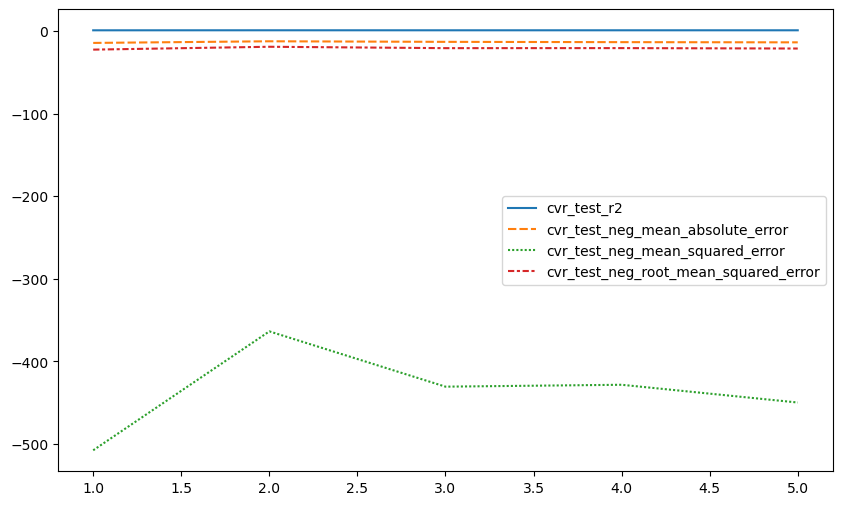

In [66]:
sns.lineplot(data = cvr_df.iloc[:, 2:])
plt.show();

In [67]:
ridge_model.coef_

array([16.98574739, 17.19923834,  5.7714866 , 17.34759944])

In [68]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [69]:
pd.concat([lm_1_df, rm_df], axis = 1)

,lm_1_coef,ridge_coef_1
0,16.985172,16.985747
1,14.962943,17.199238
2,4.573660,5.771487
3,20.743780,17.347599


In [70]:
from sklearn.linear_model import RidgeCV

In [71]:
alpha_space = np.linspace(10, 14, 100)
alpha_space

array([10.        , 10.04040404, 10.08080808, 10.12121212, 10.16161616,
       10.2020202 , 10.24242424, 10.28282828, 10.32323232, 10.36363636,
       10.4040404 , 10.44444444, 10.48484848, 10.52525253, 10.56565657,
       10.60606061, 10.64646465, 10.68686869, 10.72727273, 10.76767677,
       10.80808081, 10.84848485, 10.88888889, 10.92929293, 10.96969697,
       11.01010101, 11.05050505, 11.09090909, 11.13131313, 11.17171717,
       11.21212121, 11.25252525, 11.29292929, 11.33333333, 11.37373737,
       11.41414141, 11.45454545, 11.49494949, 11.53535354, 11.57575758,
       11.61616162, 11.65656566, 11.6969697 , 11.73737374, 11.77777778,
       11.81818182, 11.85858586, 11.8989899 , 11.93939394, 11.97979798,
       12.02020202, 12.06060606, 12.1010101 , 12.14141414, 12.18181818,
       12.22222222, 12.26262626, 12.3030303 , 12.34343434, 12.38383838,
       12.42424242, 12.46464646, 12.50505051, 12.54545455, 12.58585859,
       12.62626263, 12.66666667, 12.70707071, 12.74747475, 12.78

In [72]:
    ridge_cv_model = RidgeCV(alphas= alpha_space, cv=5, scoring="neg_root_mean_squared_error")

In [73]:
ridge_cv_model

RidgeCV(alphas=array([10.        , 10.04040404, 10.08080808, 10.12121212, 10.16161616,
       10.2020202 , 10.24242424, 10.28282828, 10.32323232, 10.36363636,
       10.4040404 , 10.44444444, 10.48484848, 10.52525253, 10.56565657,
       10.60606061, 10.64646465, 10.68686869, 10.72727273, 10.76767677,
       10.80808081, 10.84848485, 10.88888889, 10.92929293, 10.96969697,
       11.01010101, 11.05050505, 11.09090909, 11...
       12.82828283, 12.86868687, 12.90909091, 12.94949495, 12.98989899,
       13.03030303, 13.07070707, 13.11111111, 13.15151515, 13.19191919,
       13.23232323, 13.27272727, 13.31313131, 13.35353535, 13.39393939,
       13.43434343, 13.47474747, 13.51515152, 13.55555556, 13.5959596 ,
       13.63636364, 13.67676768, 13.71717172, 13.75757576, 13.7979798 ,
       13.83838384, 13.87878788, 13.91919192, 13.95959596, 14.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [74]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([10.        , 10.04040404, 10.08080808, 10.12121212, 10.16161616,
       10.2020202 , 10.24242424, 10.28282828, 10.32323232, 10.36363636,
       10.4040404 , 10.44444444, 10.48484848, 10.52525253, 10.56565657,
       10.60606061, 10.64646465, 10.68686869, 10.72727273, 10.76767677,
       10.80808081, 10.84848485, 10.88888889, 10.92929293, 10.96969697,
       11.01010101, 11.05050505, 11.09090909, 11...
       12.82828283, 12.86868687, 12.90909091, 12.94949495, 12.98989899,
       13.03030303, 13.07070707, 13.11111111, 13.15151515, 13.19191919,
       13.23232323, 13.27272727, 13.31313131, 13.35353535, 13.39393939,
       13.43434343, 13.47474747, 13.51515152, 13.55555556, 13.5959596 ,
       13.63636364, 13.67676768, 13.71717172, 13.75757576, 13.7979798 ,
       13.83838384, 13.87878788, 13.91919192, 13.95959596, 14.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [75]:
ridge_cv_model.alpha_

13.636363636363637

In [76]:
ridge_cv_model.best_score_

-20.849188299434527

In [77]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [78]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.873663,0.873535
mae,13.428366,13.162172
mse,434.959111,427.139035
rmse,20.855673,20.667342


In [79]:
pd.concat([ls_1, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.873668,0.873554,0.873667,0.873543,0.873663,0.873535
mae,13.424130,13.156975,13.424475,13.158126,13.428366,13.162172
mse,434.941944,427.074018,434.944562,427.110221,434.959111,427.139035
rmse,20.855262,20.665769,20.855325,20.666645,20.855673,20.667342


In [80]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_13.6"])

In [81]:
pd.concat([lm_1_df, rm_df, rcm_df], axis=1)

,lm_1_coef,ridge_coef_1,ridge_cv_model.coef_13.6
0,16.985172,16.985747,16.996002
1,14.962943,17.199238,18.408439
2,4.573660,5.771487,6.812353
3,20.743780,17.347599,15.084412


### Lasso

In [82]:
from sklearn.linear_model import Lasso, LassoCV

In [83]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [84]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [85]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.873341,0.873733
mae,13.651458,13.377128
mse,436.066012,426.471264
rmse,20.882194,20.651181


In [86]:
pd.concat([ls_1, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.873668,0.873554,0.873667,0.873543,0.873663,0.873535,0.873341,0.873733
mae,13.424130,13.156975,13.424475,13.158126,13.428366,13.162172,13.651458,13.377128
mse,434.941944,427.074018,434.944562,427.110221,434.959111,427.139035,436.066012,426.471264
rmse,20.855262,20.665769,20.855325,20.666645,20.855673,20.667342,20.882194,20.651181


In [87]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [88]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                               0.873070
test_neg_mean_absolute_error        -13.661825
test_neg_mean_squared_error        -437.026712
test_neg_root_mean_squared_error    -20.877882
dtype: float64

<Axes: >

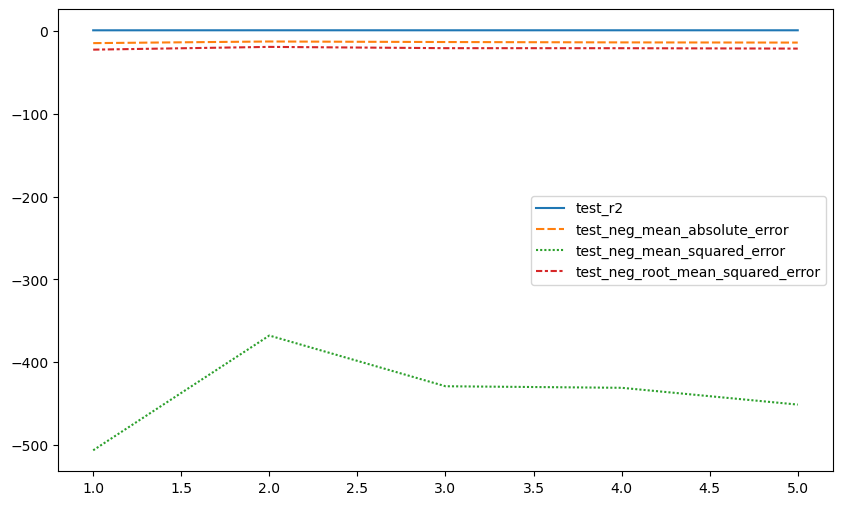

In [89]:
sns.lineplot(data = scores.iloc[:, 2:])

In [90]:
lasso_model.coef_

array([16.35376295, 17.07298064,  4.97425309, 17.7695968 ])

In [91]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns=["lasso_coef_alpha_1"])

In [92]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis=1) 

,lm_coef,ridge_coef_1,ridge_cv_model.coef_13.6,lasso_coef_alpha_1
0,49.731525,16.985747,16.996002,16.353763
1,NaN,17.199238,18.408439,17.072981
2,NaN,5.771487,6.812353,4.974253
3,NaN,17.347599,15.084412,17.769597


In [93]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [94]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=42)

In [95]:
lasso_cv_model.fit(X_train_scaled, y_train )

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [96]:
lasso_cv_model.alpha_

0.24000000000000002

In [97]:
best_alpha = lasso_cv_model.alpha_

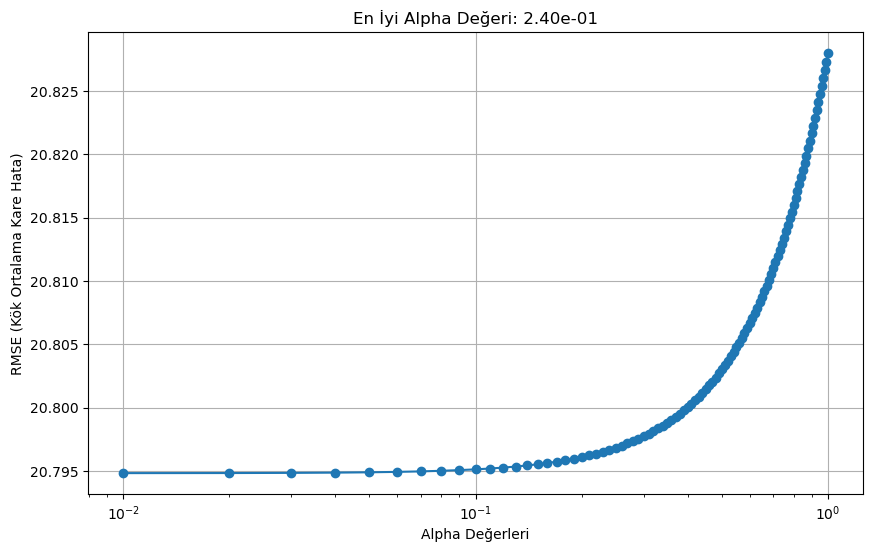

In [98]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)
# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [99]:
y_pred = lasso_cv_model.predict(X_test)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [100]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.873648,-77.456086
mae,13.473127,506.892490
mse,435.010865,264987.425310
rmse,20.856914,514.769293


In [101]:
pd.concat([ls_1, rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.873668,0.873554,0.873667,0.873543,0.873663,0.873535,0.873341,0.873733,0.873648,-77.456086
mae,13.424130,13.156975,13.424475,13.158126,13.428366,13.162172,13.651458,13.377128,13.473127,506.892490
mse,434.941944,427.074018,434.944562,427.110221,434.959111,427.139035,436.066012,426.471264,435.010865,264987.425310
rmse,20.855262,20.665769,20.855325,20.666645,20.855673,20.667342,20.882194,20.651181,20.856914,514.769293


In [102]:
lasso_cv_model.coef_

array([16.83502037, 12.20179047,  2.96067117, 24.94546221])

In [103]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv_coef_0.24"])

In [104]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_13.6,lasso_coef_alpha_1,lasso_cv_coef_0.24
0,49.731525,16.985747,16.996002,16.353763,16.835020
1,NaN,17.199238,18.408439,17.072981,12.201790
2,NaN,5.771487,6.812353,4.974253,2.960671
3,NaN,17.347599,15.084412,17.769597,24.945462


### Elastic Net

In [105]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [106]:
elastic_model = ElasticNet(alpha =1.0, l1_ratio=0.5 , random_state= 42)

In [107]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [108]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [109]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.857501,0.859910
mae,15.758966,15.419568
mse,490.601369,473.158287
rmse,22.149523,21.752202


In [110]:
pd.concat([ls_1, rs, rcs, lss, lcs, es], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.873668,0.873554,0.873667,0.873543,0.873663,0.873535,0.873341,0.873733,0.873648,-77.456086,0.857501,0.859910
mae,13.424130,13.156975,13.424475,13.158126,13.428366,13.162172,13.651458,13.377128,13.473127,506.892490,15.758966,15.419568
mse,434.941944,427.074018,434.944562,427.110221,434.959111,427.139035,436.066012,426.471264,435.010865,264987.425310,490.601369,473.158287
rmse,20.855262,20.665769,20.855325,20.666645,20.855673,20.667342,20.882194,20.651181,20.856914,514.769293,22.149523,21.752202


In [111]:
model = ElasticNet(alpha=1, l1_ratio=0.5 ,random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [112]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                               0.857366
test_neg_mean_absolute_error        -15.764043
test_neg_mean_squared_error        -490.971534
test_neg_root_mean_squared_error    -22.140930
dtype: float64

In [113]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.857501,0.859910
mae,15.758966,15.419568
mse,490.601369,473.158287
rmse,22.149523,21.752202


In [114]:
elastic_model.coef_

array([13.17816176, 12.97312536, 11.23667893, 12.54022897])

In [115]:
em_df = pd.DataFrame(elastic_model.coef_, columns = ["elastic_coef_(apl:1) l1:0.5"])

In [116]:
pd.concat([lm_1_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis=1)

,lm_1_coef,ridge_coef_1,ridge_cv_model.coef_13.6,lasso_coef_alpha_1,lasso_cv_coef_0.24,elastic_coef_(apl:1) l1:0.5
0,16.985172,16.985747,16.996002,16.353763,16.835020,13.178162
1,14.962943,17.199238,18.408439,17.072981,12.201790,12.973125
2,4.573660,5.771487,6.812353,4.974253,2.960671,11.236679
3,20.743780,17.347599,15.084412,17.769597,24.945462,12.540229


In [117]:
elastic_cv_model = ElasticNetCV(alphas= alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], 
                                cv=5, max_iter = 100000, random_state=42)

In [118]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [119]:
elastic_cv_model.alpha_

0.03

In [120]:
elastic_cv_model.l1_ratio_

0.9

In [121]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [122]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.873661,0.873546
mae,13.433930,13.167642
mse,434.965872,427.103267
rmse,20.855835,20.666477


In [123]:
pd.concat([ls_1, rs, rcs, lss, lcs, es, ecs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.873668,0.873554,0.873667,0.873543,0.873663,0.873535,0.873341,0.873733,0.873648,-77.456086,0.857501,0.859910,0.873661,0.873546
mae,13.424130,13.156975,13.424475,13.158126,13.428366,13.162172,13.651458,13.377128,13.473127,506.892490,15.758966,15.419568,13.433930,13.167642
mse,434.941944,427.074018,434.944562,427.110221,434.959111,427.139035,436.066012,426.471264,435.010865,264987.425310,490.601369,473.158287,434.965872,427.103267
rmse,20.855262,20.665769,20.855325,20.666645,20.855673,20.667342,20.882194,20.651181,20.856914,514.769293,22.149523,21.752202,20.855835,20.666477


In [124]:
elastic_cv_model.coef_

array([16.97968594, 18.54357658,  6.93191721, 14.81495228])

In [125]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

pd.concat([lm_1_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_1_coef,ridge_coef_1,ridge_cv_model.coef_13.6,lasso_coef_alpha_1,lasso_cv_coef_0.24,elastic_coef_(apl:1) l1:0.5,"elastic_coef_(alp:0.01, l1:1)"
0,16.985172,16.985747,16.996002,16.353763,16.835020,13.178162,16.979686
1,14.962943,17.199238,18.408439,17.072981,12.201790,12.973125,18.543577
2,4.573660,5.771487,6.812353,4.974253,2.960671,11.236679,6.931917
3,20.743780,17.347599,15.084412,17.769597,24.945462,12.540229,14.814952


## Grid Search

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
linear_model = LinearRegression()

In [128]:
# Train a linear regression model using grid search and cross-validation
linear_model = LinearRegression()

param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

grid_model = GridSearchCV(linear_model, param_grid, cv=15, scoring='neg_mean_squared_error')
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=15, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [129]:
grid_model.best_params_

{'fit_intercept': True, 'positive': False}

In [130]:
grid_model.best_index_

1

In [131]:
grid_model.best_score_

-436.12097777683255

In [132]:
pd.DataFrame(pd.DataFrame(grid_model.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000769,0.000285,0.000223,0.000116,True,True,"{'fit_intercept': True, 'positive': True}",-538.881338,-531.801748,-452.404354,-385.368538,-348.440412,-355.242391,-475.844832,-391.905176,-430.811147,-434.375683,-377.065291,-466.705490,-422.192195,-440.592175,-490.183896,-436.120978,56.514740,2
1,0.000492,0.000051,0.000138,0.000027,True,False,"{'fit_intercept': True, 'positive': False}",-538.881338,-531.801748,-452.404354,-385.368538,-348.440412,-355.242391,-475.844832,-391.905176,-430.811147,-434.375683,-377.065291,-466.705490,-422.192195,-440.592175,-490.183896,-436.120978,56.514740,1
2,0.000646,0.000190,0.000244,0.000120,False,True,"{'fit_intercept': False, 'positive': True}",-63472.461715,-62639.986116,-63502.965331,-63125.193728,-63975.706874,-63732.561268,-62877.651823,-63984.628233,-63297.848722,-62785.057359,-62895.133940,-63658.464067,-63926.180685,-63853.801975,-62673.513786,-63360.077042,477.676670,3
3,0.000358,0.000007,0.000124,0.000002,False,False,"{'fit_intercept': False, 'positive': False}",-63473.202365,-62645.013499,-63531.299572,-63161.217048,-63975.706874,-63799.804266,-62893.687112,-64017.644579,-63305.820247,-62790.082950,-62898.902469,-63661.293726,-64153.141944,-63875.054372,-62751.893003,-63395.584268,496.093467,4


In [133]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.873661,0.873546
mae,13.433930,13.167642
mse,434.965872,427.103267
rmse,20.855835,20.666477


In [134]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

## Final Model

In [135]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(df_1)

In [136]:
final_model = LinearRegression()

In [137]:
final_model.fit(X_scaled, y)

LinearRegression()

## Feature Importance with Ridge

In [138]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

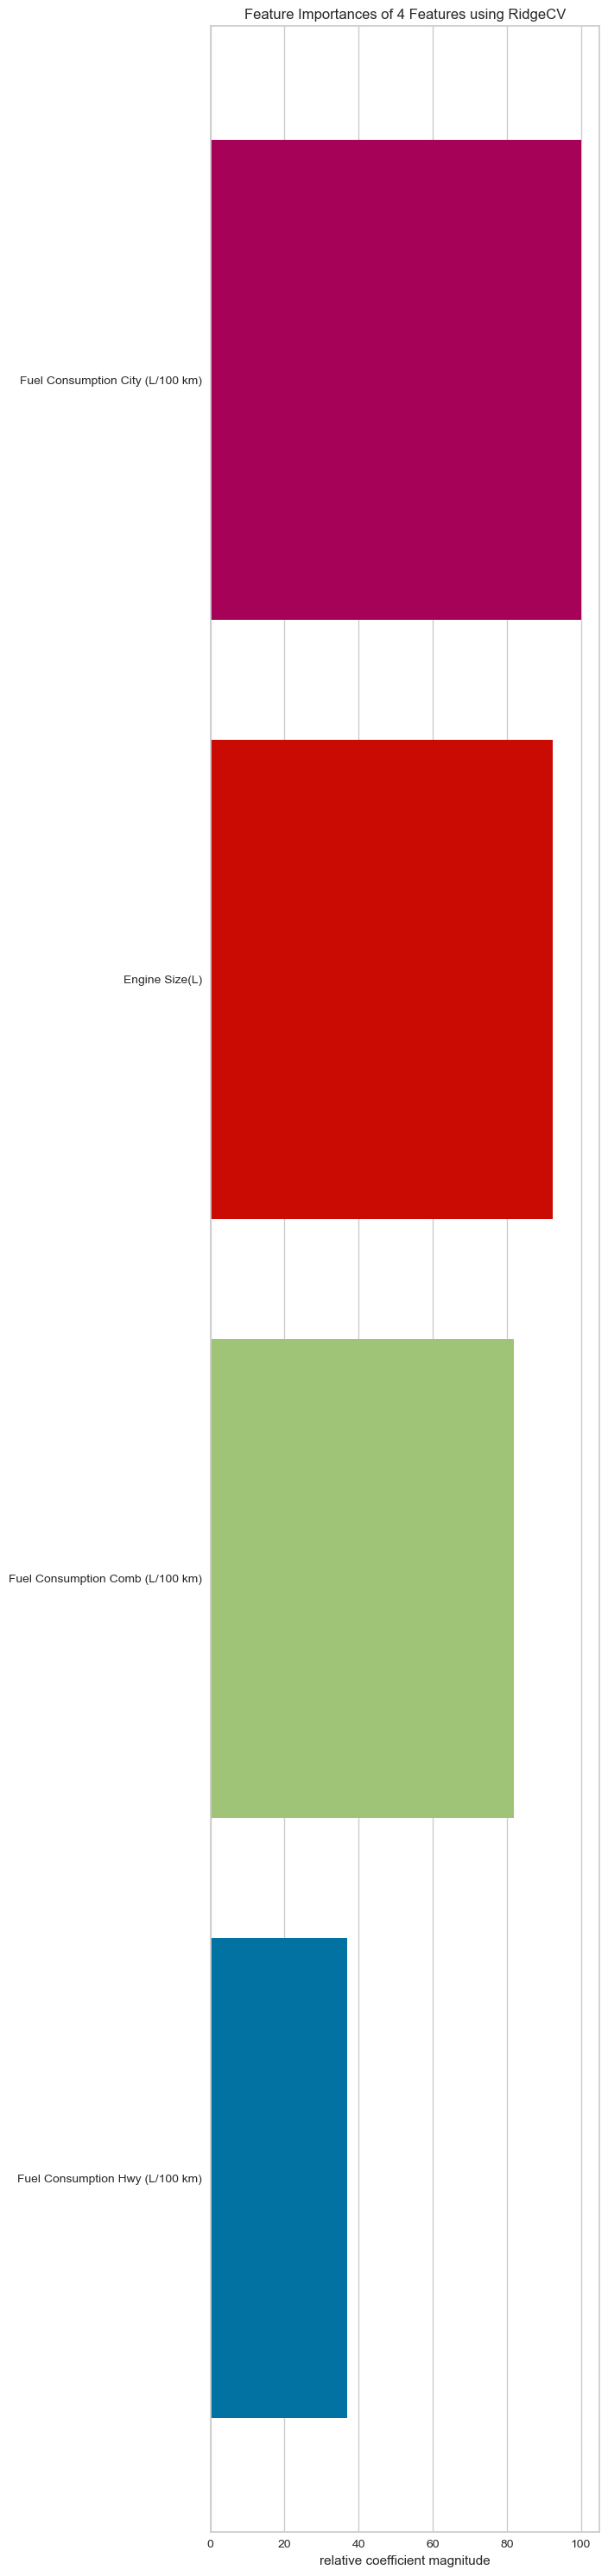

<Axes: title={'center': 'Feature Importances of 4 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [139]:
viz = FeatureImportances(ridge_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show()

## Feature Importance with Lasso

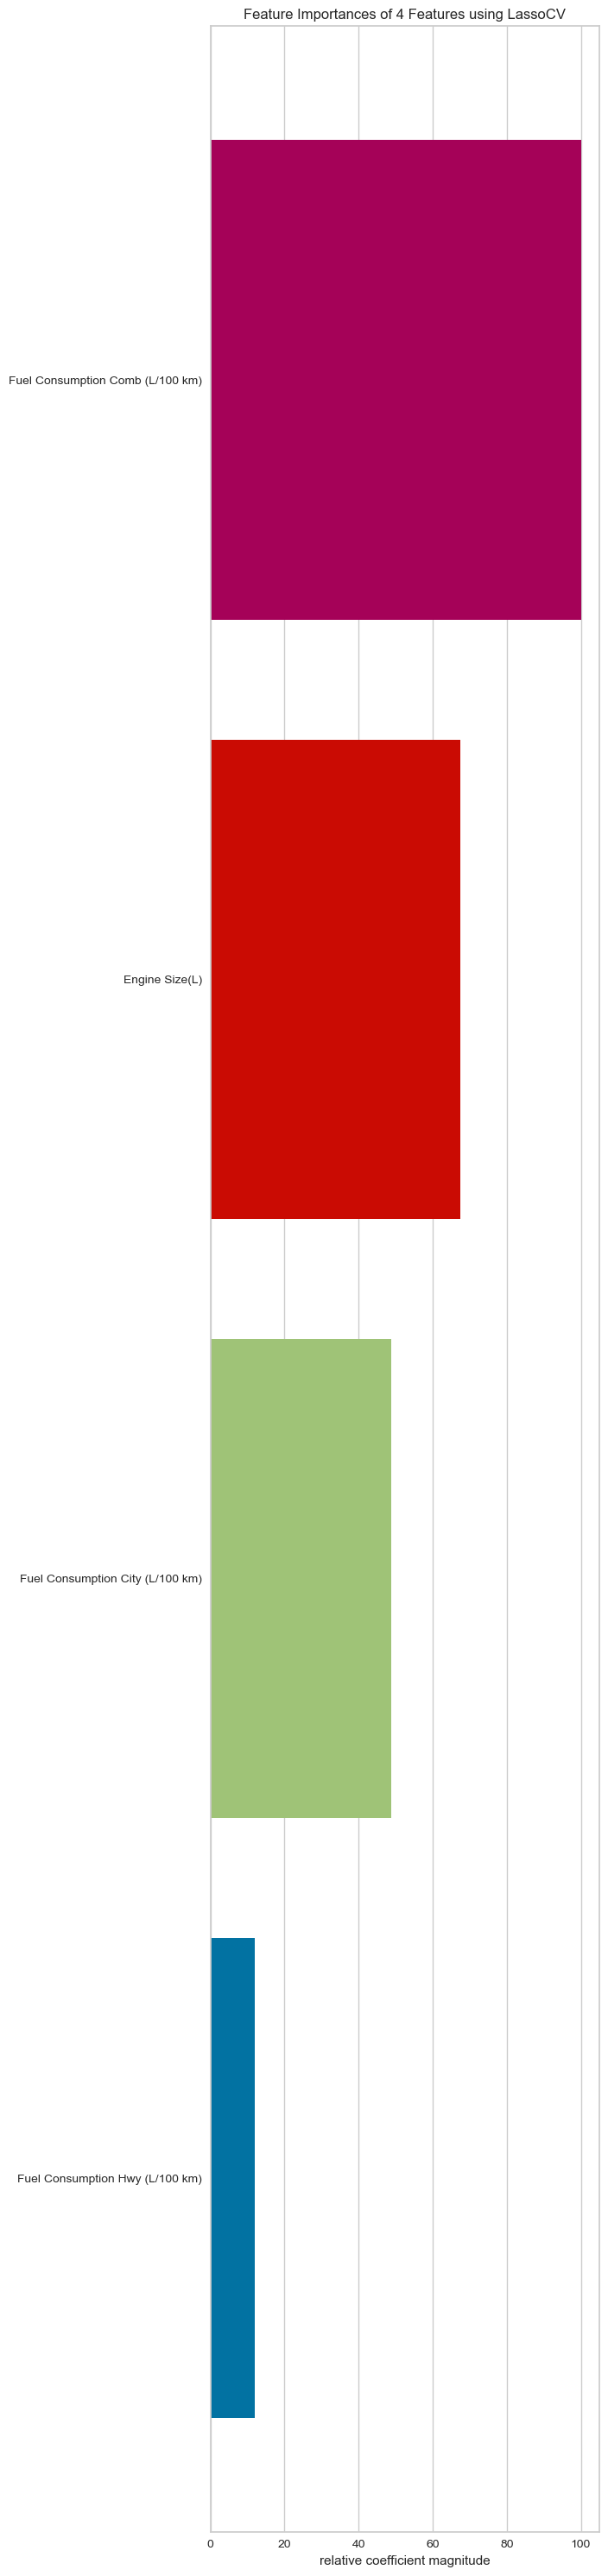

<Axes: title={'center': 'Feature Importances of 4 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [140]:
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()